In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
nubb_meta_nodiff     = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_nodiff_reco.h5", "meta")
nubb_meta_5percent   = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_5percent_reco.h5", "meta")
nubb_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_0.25percent_reco.h5", "meta")
nubb_meta_01percent = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_0.1percent_reco.h5", "meta")
nubb_meta_005percent = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_0.05percent_reco.h5", "meta")
nubb_meta_00percent = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_0.0percent_reco.h5", "meta")
# display(nubb_meta_nodiff)
# display(nubb_meta_5percent)


Tl_meta_nodiff     = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_nodiff_reco.h5", "meta")
Tl_meta_5percent   = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_5percent_reco.h5", "meta")
Tl_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_0.25percent_reco.h5", "meta")
Tl_meta_01percent = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_0.1percent_reco.h5", "meta")
Tl_meta_005percent = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_0.05percent_reco.h5", "meta")
Tl_meta_00percent = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_0.0percent_reco.h5", "meta")
# display(Tl_meta_nodiff)
# display(Tl_meta_5percent)

Bi_meta_nodiff     = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_nodiff_reco.h5", "meta")
Bi_meta_5percent   = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_5percent_reco.h5", "meta")
Bi_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_0.25percent_reco.h5", "meta")
Bi_meta_01percent = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_0.1percent_reco.h5", "meta")
Bi_meta_005percent = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_0.05percent_reco.h5", "meta")
Bi_meta_00percent = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_0.0percent_reco.h5", "meta")
# display(Bi_meta_nodiff)
# display(Bi_meta_5percent)


single_meta_nodiff     = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_nodiff_reco.h5", "meta")
single_meta_5percent   = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_5percent_reco.h5", "meta")
single_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_0.25percent_reco.h5", "meta")
single_meta_01percent  = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_0.1percent_reco.h5", "meta")
single_meta_005percent  = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_0.05percent_reco.h5", "meta")
single_meta_00percent  = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_0.0percent_reco.h5", "meta")


Bkg_meta_nodiff      = pd.concat([Tl_meta_nodiff,     Bi_meta_nodiff, single_meta_nodiff])
Bkg_meta_5percent    = pd.concat([Tl_meta_5percent,   Bi_meta_5percent, single_meta_5percent])
Bkg_meta_025percent  = pd.concat([Tl_meta_025percent, Bi_meta_025percent, single_meta_025percent])
Bkg_meta_01percent   = pd.concat([Tl_meta_01percent,  Bi_meta_01percent, single_meta_01percent])
Bkg_meta_005percent   = pd.concat([Tl_meta_005percent,  Bi_meta_005percent, single_meta_005percent])
Bkg_meta_00percent   = pd.concat([Tl_meta_00percent,  Bi_meta_00percent, single_meta_00percent])

# Bkg_meta_nodiff      = pd.concat([single_meta_nodiff])
# Bkg_meta_5percent    = pd.concat([single_meta_5percent])
# Bkg_meta_025percent  = pd.concat([single_meta_025percent])
# Bkg_meta_01percent   = pd.concat([single_meta_01percent])
# Bkg_meta_00percent   = pd.concat([single_meta_00percent])


# Bkg_meta_nodiff      = pd.concat([Bi_meta_nodiff])
# Bkg_meta_5percent    = pd.concat([Bi_meta_5percent])
# Bkg_meta_025percent  = pd.concat([Bi_meta_025percent])
# Bkg_meta_01percent   = pd.concat([Bi_meta_01percent])
# Bkg_meta_00percent   = pd.concat([Bi_meta_00percent])



In [4]:
num_nubb_nodiff     = len(nubb_meta_nodiff.event_id.unique())
num_nubb_5percent   = len(nubb_meta_5percent.event_id.unique())
num_nubb_025percent = len(nubb_meta_025percent.event_id.unique())
num_nubb_01percent  = len(nubb_meta_01percent.event_id.unique())
num_nubb_005percent = len(nubb_meta_005percent.event_id.unique())
num_nubb_00percent  = len(nubb_meta_00percent.event_id.unique())

num_Bkg_nodiff      = len(Bkg_meta_nodiff.event_id.unique())
num_Bkg_5percent    = len(Bkg_meta_5percent.event_id.unique())
num_Bkg_025percent  = len(Bkg_meta_025percent.event_id.unique())
num_Bkg_01percent   = len(Bkg_meta_01percent.event_id.unique())
num_Bkg_005percent  = len(Bkg_meta_005percent.event_id.unique())
num_Bkg_00percent   = len(Bkg_meta_00percent.event_id.unique())

num_Bi_nodiff      = len(Bi_meta_nodiff.event_id.unique())
num_Bi_5percent    = len(Bi_meta_5percent.event_id.unique())
num_Bi_025percent  = len(Bi_meta_025percent.event_id.unique())
num_Bi_01percent   = len(Bi_meta_01percent.event_id.unique())
num_Bi_005percent  = len(Bi_meta_005percent.event_id.unique())
num_Bi_00percent   = len(Bi_meta_00percent.event_id.unique())

num_Tl_nodiff      = len(Tl_meta_nodiff.event_id.unique())
num_Tl_5percent    = len(Tl_meta_5percent.event_id.unique())
num_Tl_025percent  = len(Tl_meta_025percent.event_id.unique())
num_Tl_01percent   = len(Tl_meta_01percent.event_id.unique())
num_Tl_005percent  = len(Tl_meta_005percent.event_id.unique())
num_Tl_00percent   = len(Tl_meta_00percent.event_id.unique())

num_single_nodiff      = len(single_meta_nodiff.event_id.unique())
num_single_5percent    = len(single_meta_5percent.event_id.unique())
num_single_025percent  = len(single_meta_025percent.event_id.unique())
num_single_01percent   = len(single_meta_01percent.event_id.unique())
num_single_005percent  = len(single_meta_005percent.event_id.unique())
num_single_00percent   = len(single_meta_00percent.event_id.unique())


sf_nubb_nodiff     = 1
sf_nubb_5percent   = num_nubb_nodiff / num_nubb_5percent
sf_nubb_025percent = num_nubb_nodiff / num_nubb_025percent
sf_nubb_01percent  = num_nubb_nodiff / num_nubb_01percent
sf_nubb_005percent = num_nubb_nodiff / num_nubb_005percent
sf_nubb_00percent  = num_nubb_nodiff / num_nubb_00percent

sf_Bkg_nodiff      = num_nubb_nodiff / num_Bkg_nodiff
sf_Bkg_5percent    = num_nubb_nodiff / num_Bkg_5percent
sf_Bkg_025percent  = num_nubb_nodiff / num_Bkg_025percent
sf_Bkg_01percent   = num_nubb_nodiff / num_Bkg_01percent
sf_Bkg_005percent  = num_nubb_nodiff / num_Bkg_005percent
sf_Bkg_00percent   = num_nubb_nodiff / num_Bkg_00percent

print("tot, scale fact num_nubb_nodiff:",     num_nubb_nodiff,     sf_nubb_nodiff)
print("tot, scale fact num_nubb_5percent:",   num_nubb_5percent,   sf_nubb_5percent)
print("tot, scale fact num_nubb_025percent:", num_nubb_025percent, sf_nubb_025percent)
print("tot, scale fact num_nubb_01percent:",  num_nubb_01percent,  sf_nubb_01percent)
print("tot, scale fact num_nubb_005percent:", num_nubb_005percent, sf_nubb_005percent)
print("tot, scale fact num_nubb_00percent:",  num_nubb_00percent,  sf_nubb_00percent)

print("tot, scale fact num_Tl_nodiff:",       num_Bkg_nodiff,      sf_Bkg_nodiff)
print("tot, scale fact num_Tl_5percent:",     num_Bkg_5percent,    sf_Bkg_5percent)
print("tot, scale fact num_Tl_025percent:",   num_Bkg_025percent,  sf_Bkg_025percent)
print("tot, scale fact num_Tl_01percent:",    num_Bkg_01percent,   sf_Bkg_01percent)
print("tot, scale fact num_Tl_005percent:",   num_Bkg_005percent,  sf_Bkg_005percent)
print("tot, scale fact num_Tl_00percent:",    num_Bkg_00percent,   sf_Bkg_00percent)

tot, scale fact num_nubb_nodiff: 192363 1
tot, scale fact num_nubb_5percent: 192957 0.9969215939302539
tot, scale fact num_nubb_025percent: 192889 0.9972730430454821
tot, scale fact num_nubb_01percent: 192971 0.9968492675065165
tot, scale fact num_nubb_005percent: 192774 0.9978679697469576
tot, scale fact num_nubb_00percent: 193021 0.9965910444977489
tot, scale fact num_Tl_nodiff: 582063 0.3304848444240572
tot, scale fact num_Tl_5percent: 570694 0.3370685516231115
tot, scale fact num_Tl_025percent: 559462 0.3438356849973725
tot, scale fact num_Tl_01percent: 525037 0.3663798932265726
tot, scale fact num_Tl_005percent: 464622 0.41402042951044077
tot, scale fact num_Tl_00percent: 547756 0.35118373874498865


In [16]:
# Plot some variables like number of tracks
%matplotlib widget



# Function to compute count-based ratio per event_id
def compute_ratio(group):
    # Group 1: Count of Primary + Delta*
    count_group1 = group[group["label"].str.startswith(("Primary", "Delta"))].shape[0]

    # Group 2: Count of Brem* where 0.025 < energy < 0.035 (X-rays)
    count_xrays = group[(group["label"].str.startswith("Brem")) & (group["energy"].between(0.025, 0.035))].shape[0]

    # Group 3: Count of Brem* where energy ≤ 0.025 or ≥ 0.035
    count_group3 = group[(group["label"].str.startswith("Brem")) & (~group["energy"].between(0.025, 0.035))].shape[0]

    # Compute ratio
    ratio = count_xrays / (count_group1 + count_group3)
    
    return ratio

# applies cuts to the delta, brem and primary+delta energies
def ApplyGeneralCuts(df_meta, df_primary, cut_brem, cut_delta, cut_trk_e):

    brems  = GetBrems(df_meta)

    brems = brems[brems.energy > cut_brem] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(brems.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(brems.event_id.unique())]

    deltas  = GetDeltas(df_meta)

    deltas = deltas[deltas.energy > cut_delta] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(deltas.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(deltas.event_id.unique())]


    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    trk_energies = trk_energies[trk_energies > cut_trk_e]
    unique_events_list = trk_energies.index.unique().tolist()

    df_meta = df_meta[~df_meta.event_id.isin(unique_events_list)]
    df_primary = df_primary[~df_primary.event_id.isin(unique_events_list)]

    return df_meta, df_primary

def ApplyDeltaLenCut(df_meta, df_primary, cut_delta):

    deltas  = GetDeltas(df_meta)

    deltas = deltas[deltas.length > cut_delta] # these are events to cut

    df_meta    = df_meta[~df_meta.event_id.isin(deltas.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(deltas.event_id.unique())]

    return df_meta, df_primary

def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


def GetNParticles(df_meta, label):
    # Set threshold for cumulative_distance
    threshold = 0

    # Filter events with brem in the name
    filtered_df = df_meta[df_meta["label"].str.contains(label, na=False)]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": f"N_{label}"}, inplace=True)

    return trk_counts


def GetDeltas(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Delta", na=False)]

    return filtered_df

def GetBrems(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Brem", na=False)]

    return filtered_df

# Gets the sum of the primary track and the delta energies
def GetTrackDeltaEnergy(df_meta):
    # Filter events with brem in the name
    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    return trk_energies.values

# Cut out events with Brem in the name
def ApplyNTracksLenCut(df_meta, df_primary, keep_xrays):

    brems  = GetBrems(df_meta)

    if (keep_xrays):
        brems = brems[ (brems.energy < 28e-3) & (brems.energy > 30e-3) ] # these are events to cut

    df_meta    = df_meta[~df_meta.event_id.isin(brems.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(brems.event_id.unique())]

    return df_meta, df_primary


# Cut out events with Brem in the name
def ApplyEventEnergyCut(df_meta, df_primary, E_res):

    event_energy = df_meta.groupby("event_id").energy.sum()

    if (E_res == 0.5):
        good_events = event_energy[(event_energy >= 2.454) & (event_energy <= 2.471)].index # 0.5%
    else:
        good_events = event_energy[(event_energy >= 2.433) & (event_energy <= 2.48)].index # 1.0%
    df_meta = df_meta[df_meta["event_id"].isin(good_events)]
    df_primary = df_primary[df_primary["event_id"].isin(good_events)]

    return df_meta, df_primary

def ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, Eres):

    cuts = []

    # Apply containment
    df_meta = df_meta[df_meta.contained == True]
    df_primary = df_primary[df_primary.contained == True]

    # 1 bar
    if (pressure == 1):
       
        # 1bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 0.175, 2.5)
                # df_meta, df_primary = ApplyDeltaLenCut(df_meta,df_primary, 80)
                # cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.337) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.1) & (df_primary.Tortuosity1 > 1.1)
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob1R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.Tortuosity2 > 1.7) & (df_primary.energy > 1.95) & (df_primary.Squiglicity2 > 2)
            
            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.35) & (df_primary.blob1R > 0.35) & (df_primary.blob2 > 0.35) & (df_primary.Tortuosity2 > 1.7) & (df_primary.energy > 2.2)

            else:
                print("Unknown mode target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 5%
        elif (diffusion == "5percent"):
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.115, 0.15, 2.5)
                # cuts = (df_primary.blob2R > 0.4) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 >1.66)
                # cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.2) & (df_primary.Tortuosity2 >1.3) & (df_primary.Tortuosity1 >1.3)
                cuts = (df_primary.blob2R > 0.37) & (df_primary.blob1R > 0.34) &  (df_primary.energy > 2.35) & (df_primary.Tortuosity2 >1.3)

            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=True)
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.3) 

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.2) & (df_primary.Tortuosity2 >1.3) & (df_primary.Tortuosity1 >1.3)
                cuts = (df_primary.blob2R > 0.34) & (df_primary.blob1R > 0.34) &  (df_primary.energy > 2.4) & (df_primary.Tortuosity2 >1.5)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.25%
        elif (diffusion == "0.25percent"):
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # cuts = (df_primary.blob2R > 0.35) & (df_primary.blob2 > 0.3)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & \
                #     (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.6) & (df_primary.Squiglicity2 > 0.5)

                cuts = (df_primary.blob2R > 0.38) & (df_primary.blob2 > 0.35) & (df_primary.blob1R > 0.3)  & (df_primary.energy > 2.39)

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.41) & (df_primary.blob2 > 0.45) & (df_primary.blob1R > 0.4)  & (df_primary.energy > 2.4)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.1%
        elif (diffusion == "0.1percent"):
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.08, 0.1, 2.5)
                # cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.38)     & (df_primary.blob1R > 0.44) & (df_primary.energy > 2.4) & \
                #     (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.6) & (df_primary.Squiglicity2 > 0.5) & (df_primary.Tortuosity1 > 1.6)

                cuts = (df_primary.blob2R > 0.385) & (df_primary.blob2 > 0.3)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & (df_primary.length > 1000)

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.39) & (df_primary.blob2 > 0.39)     & (df_primary.blob1R > 0.39) & (df_primary.energy > 2.4)
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 10 He%
        elif (diffusion == "0.05percent"):
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.08, 0.1, 2.5)
                # cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.38)     & (df_primary.blob1R > 0.44) & (df_primary.energy > 2.4) & \
                #     (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.6) & (df_primary.Squiglicity2 > 0.5) & (df_primary.Tortuosity1 > 1.6)

                cuts = (df_primary.blob2R > 0.33) & (df_primary.blob2 > 0.3)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & (df_primary.length > 600)

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.39) & (df_primary.blob2 > 0.39)     & (df_primary.blob1R > 0.39) & (df_primary.energy > 2.4)

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.0%
        elif (diffusion == "0.0percent"):
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.13, 3, 2.5)
                cuts = (df_primary.blob2 > 0.18) & (df_primary.blob2R > 0.18) &  (df_primary.energy > 2.33) & (df_primary.length > 600)

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2 > 0.27) & (df_primary.blob2R > 0.27) & (df_primary.blob1R > 0.27) & (df_primary.energy > 2.4)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")
    # -------------------------------------------------------------------------------------------------------------------------------------
    # 5bar
    elif (pressure == 5):
    
        # 5 bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) & (df_primary.blob1 > 0.35) & (df_primary.energy > 2.3) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.35) & (df_primary.Tortuosity1 > 1.65)
            
            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 5bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                # cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) & (df_primary.blob1R > 0.35) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.63)
                cuts = (df_primary.blob2R > 0.35) & (df_primary.blob1R > 0.35) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.3)
            
            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.3) & (df_primary.blob2 > 0.4) 

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                # cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) & (df_primary.blob1R > 0.35) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.63)
                cuts = (df_primary.blob2R > 0.37) &  (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.37) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.3) & (df_primary.Tortuosity1 > 1.1)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 10bar
    elif (pressure == 10):

        # 10bar no diff
        if (diffusion == "nodiff"):
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.1) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.27) & (df_primary.Tortuosity1 > 1.25)
            
            else:
                print("Unknown diffusion specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 10bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                # cuts = (df_primary.blob2R > 0.23) & (df_primary.blob2 > 0.23) & (df_primary.blob1 > 0.23) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.34)
                cuts = (df_primary.blob2R > 0.3) & (df_primary.blob2 > 0.23) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.06)

            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.3) & (df_primary.blob2 > 0.4) 

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                # df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                # cuts = (df_primary.blob2R > 0.23) & (df_primary.blob2 > 0.23) & (df_primary.blob1 > 0.23) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.34)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.42) & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.06)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 15bar
    elif (pressure == 15):
        
        # 15bar no diff
        if (diffusion == "nodiff"):
        
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 3, 2.5)
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.15)
            
            else:
                print("Unknown efficiency target specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 15bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.Tortuosity2 > 1.01)


            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) 

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.47) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.Tortuosity2 > 1.01)
            
        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 25bar
    elif (pressure == 25):

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 25bar 5%
        if (diffusion == "5percent"):
            
            # All cuts
            if (mode == "all"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.1, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.3) & (df_primary.energy > 2.4) 
        
            elif (mode == "simple"):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, keep_xrays=False)
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) 

            elif (mode == "nat"):
                df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.1, 3, 2.5)
                cuts = (df_primary.blob2R > 0.36) & (df_primary.blob2 > 0.33) & (df_primary.blob1 > 0.5) & (df_primary.energy > 2.4) 

        else:
            print("Unknown diffusion specified")

    else:
        print("Unknown pressure specified")

    return df_meta, df_primary, cuts

def PlotDistributionswithCuts(df_meta, col, label, pressure, diffusion, mode, scale_factor):

    print("Running cuts with")
    print("Pressure:",  pressure,"bar")
    print("Diffusion:", diffusion )
    print("Cut mode is :", mode)

    uselog=True

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, 1.0)
    

    df_primary = df_primary[ cuts ]

    df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    df_counts      = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem  = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    # Calculate the ratio of x-rays to tracks
    # x_ray_ratio = df_meta.groupby("event_id").apply(compute_ratio).reset_index(name="ratio")


    weights        = np.ones_like(df_primary.energy)  * scale_factor
    weights_counts = np.ones_like(df_counts.N_tracks) * scale_factor
    weights_deltas = np.ones_like(deltas.energy)      * scale_factor
    weights_brem   = np.ones_like(brems.energy)       * scale_factor
    weights_Ndelta = np.ones_like(N_delta.N_Delta)    * scale_factor
    weights_Nbrem  = np.ones_like(N_brem.N_Brem)      * scale_factor
    weights_trke   = np.ones_like(trk_e)              * scale_factor

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_counts);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()
    if (uselog): axs[0,0].semilogy()

    axs[0,1].hist(df_primary.length*pressure, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length * P [mm bar]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()
    if (uselog): axs[0,1].semilogy()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()
    if (uselog): axs[0,2].semilogy()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()
    if (uselog): axs[1,1].semilogy()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()
    if (uselog): axs[2,1].semilogy()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()
    if (uselog): axs[1,0].semilogy()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()
    if (uselog): axs[2,0].semilogy()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()
    if (uselog): axs[1,2].semilogy()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()
    if (uselog): axs[2,2].semilogy()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()
    if (uselog): axs[3,0].semilogy()

    axs[3,1].hist(df_primary.Tortuosity1/df_primary.Tortuosity2, bins = np.linspace(0, 3, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Ends Ratio")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    if (uselog): axs[3,1].semilogy()

    axs[3,2].hist(df_primary.Squiglicity1/df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Ends Ratio")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()
    if (uselog): axs[3,2].semilogy()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()
    if (uselog): axs[4,0].semilogy()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()
    if (uselog): axs[4,1].semilogy()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()
    if (uselog): axs[4,2].semilogy()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()
    if (uselog): axs[5,0].semilogy()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Nbrem);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()
    if (uselog): axs[5,1].semilogy()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Ndelta);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()
    if (uselog): axs[5,2].semilogy()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights_trke);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    if (uselog): axs[6,0].semilogy()


    bin_edges = np.arange(-0.5, 3.5, 0.5)
    bin_centers = np.arange(0, 3, 0.5)

    # Multiplicities
    # axs[6,1].hist(x_ray_ratio.ratio, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[6,1].set_xlabel("N x-rays per track")
    # axs[6,1].set_ylabel("Entries")
    # axs[6,1].set_xticks(bin_centers) ;
    # axs[6,1].legend()
    # if (uselog): axs[6,1].semilogy()



    plt.tight_layout()

    return len(df_primary.event_id.unique())

# fig, axs = plt.subplots(7, 3, figsize=(15, 25))


# num_nubb_nodiff_cut     = PlotDistributionswithCuts(nubb_meta_nodiff,     "orange",   "0nubb no diff", 1,   "nodiff",      "all",  sf_nubb_nodiff)
# num_nubb_5percent_cut   = PlotDistributionswithCuts(nubb_meta_5percent,   "gold",     "0nubb 5% CO2", 1,    "5percent",    "all",  sf_nubb_5percent)
# num_nubb_025percent_cut = PlotDistributionswithCuts(nubb_meta_025percent, "seagreen", "0nubb 0.25% CO2", 1, "0.25percent", "all",  sf_nubb_025percent)
# num_nubb_01percent_cut  = PlotDistributionswithCuts(nubb_meta_01percent,  "Pink",     "0nubb 0.1% CO2", 1,  "0.1percent",  "all",  sf_nubb_01percent)
# num_nubb_00percent_cut  = PlotDistributionswithCuts(nubb_meta_00percent,  "darkgreen","0nubb Pure Xe", 1,  "0.0percent",   "all",  sf_nubb_00percent)

# num_Bkg_nodiff_cut     = PlotDistributionswithCuts(Bkg_meta_nodiff,     "Teal",       "Bkg no diff", 1,   "nodiff",      "all",  sf_Bkg_nodiff)
# num_Bkg_5percent_cut   = PlotDistributionswithCuts(Bkg_meta_5percent,   "steelblue",  "Bkg 5% CO2", 1,    "5percent",    "all",  sf_Bkg_5percent)
# num_Bkg_025percent_cut = PlotDistributionswithCuts(Bkg_meta_025percent, "slategray",  "Bkg 0.25% CO2", 1, "0.25percent", "all",  sf_Bkg_025percent)
# num_Bkg_01percent_cut  = PlotDistributionswithCuts(Bkg_meta_01percent,  "darkviolet", "Bkg 0.1% CO2", 1,  "0.1percent",  "all",  sf_Bkg_01percent)
# num_Bkg_00percent_cut  = PlotDistributionswithCuts(Bkg_meta_00percent,  "k",          "Bkg Pure Xe", 1,  "0.0percent",   "all",  sf_Bkg_00percent)



In [7]:
def ApplyCutsnoPlot(df_meta, pressure, diffusion, mode, E_res):
    
    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, E_res)
    df_primary = df_primary[ cuts ]

    return len(df_primary.event_id.unique())

def ApplyContainmentCorr(eff, p, mass):

    if (p == 1):
        if mass == 1:
            factor = 0.532
        else:
            factor = 0.690
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 5):
        if mass == 1:
            factor = 0.740
        else:
            factor = 0.828
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 10):
        if mass == 1:
            factor = 0.806
        else:
            factor = 0.872
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 15):
        if mass == 1:
            factor = 0.835
        else:
            factor = 0.898
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    elif (p == 25):
        if mass == 1:
            factor = 0.876
        else:
            factor = 0.92
        print("Correcting Efficiency by factor ", factor)
        return eff*factor
    else:
        return eff


def FOM(eff, bkg_eff):
    return eff/np.sqrt(bkg_eff)

def CalcEfficiency(n, N, label, pressure, mass):
    efficiency = n/N

    if (label == "Bkg"):
        error=np.sqrt( (efficiency/N) * (1-efficiency)  )
        print(f"Bkg eff: {label}:", round(100*efficiency, 3), "+/-", round(100*error,3),  "%", "     (bkg rej ==", round(100-100*efficiency,3), "%)")
    else:
        efficiency = ApplyContainmentCorr(efficiency, pressure, mass)
        error=np.sqrt( (efficiency/N) * (1-efficiency)  )
        print(f"Efficiency {label}:",  round(100*efficiency, 3), " +/-", round(100*error,3),  "%")

    return efficiency, error

On Diffusion no diff
Correcting Efficiency by factor  0.532
Efficiency nubb: 30.351  +/- 0.105 %
Bkg eff: Bkg: 2.151 +/- 0.019 %      (bkg rej == 97.849 %)
On Diffusion 5% 
CO2
Correcting Efficiency by factor  0.532
Efficiency nubb: 30.462  +/- 0.105 %
Bkg eff: Bkg: 0.858 +/- 0.012 %      (bkg rej == 99.142 %)
On Diffusion 0.25% 
CO2
Correcting Efficiency by factor  0.532
Efficiency nubb: 30.502  +/- 0.105 %
Bkg eff: Bkg: 1.173 +/- 0.014 %      (bkg rej == 98.827 %)
On Diffusion 0.1% 
CO2
Correcting Efficiency by factor  0.532
Efficiency nubb: 30.408  +/- 0.105 %
Bkg eff: Bkg: 1.533 +/- 0.017 %      (bkg rej == 98.467 %)
On Diffusion 10%
He
Correcting Efficiency by factor  0.532
Efficiency nubb: 30.167  +/- 0.105 %
Bkg eff: Bkg: 2.517 +/- 0.023 %      (bkg rej == 97.483 %)
On Diffusion Pure Xe
Correcting Efficiency by factor  0.532
Efficiency nubb: 30.085  +/- 0.104 %
Bkg eff: Bkg: 12.639 +/- 0.045 %      (bkg rej == 87.361 %)
On Diffusion no diff
Correcting Efficiency by factor  0.532

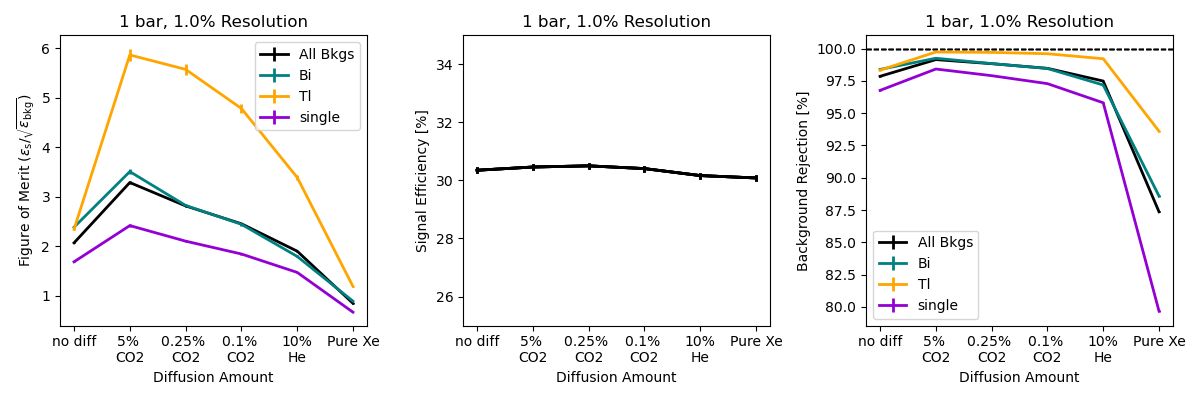

In [19]:
nubb_meta = [nubb_meta_nodiff, nubb_meta_5percent, nubb_meta_025percent, nubb_meta_01percent,nubb_meta_005percent, nubb_meta_00percent]
Bkg_meta  = [Bkg_meta_nodiff,  Bkg_meta_5percent,  Bkg_meta_025percent,  Bkg_meta_01percent,Bkg_meta_005percent,  Bkg_meta_00percent]
Bi_meta  = [Bi_meta_nodiff,  Bi_meta_5percent,  Bi_meta_025percent,  Bi_meta_01percent,Bi_meta_005percent, Bi_meta_00percent]
Tl_meta  = [Tl_meta_nodiff,  Tl_meta_5percent,  Tl_meta_025percent,  Tl_meta_01percent, Tl_meta_005percent, Tl_meta_00percent]
single_meta  = [single_meta_nodiff,  single_meta_5percent,  single_meta_025percent,  single_meta_01percent, single_meta_005percent, single_meta_00percent]


num_nubb = [num_nubb_nodiff, num_nubb_5percent, num_nubb_025percent, num_nubb_01percent,num_nubb_005percent, num_nubb_00percent]
num_Bkg  = [num_Bkg_nodiff,  num_Bkg_5percent, num_Bkg_025percent, num_Bkg_01percent,num_Bkg_005percent, num_Bkg_00percent]
num_Bi  = [num_Bi_nodiff,  num_Bi_5percent, num_Bi_025percent, num_Bi_01percent,num_Bi_005percent, num_Bi_00percent]
num_Tl  = [num_Tl_nodiff,  num_Tl_5percent, num_Tl_025percent, num_Tl_01percent,num_Tl_005percent, num_Tl_00percent]
num_single  = [num_single_nodiff,  num_single_5percent, num_single_025percent, num_single_01percent,num_single_005percent, num_single_00percent]

cols = ["k", "Teal", "Orange", "darkviolet", "Yellow",  "Pink"]
diffusion_labels = ["no diff", "5% \nCO2", "0.25% \nCO2", "0.1% \nCO2", "10%\nHe" ,"Pure Xe"]
diffusions = ["nodiff","5percent", "0.25percent", "0.1percent", "0.05percent", "0.0percent"]
pressures = [1, 1, 1, 1, 1, 1]

def Calc_FOM_err(fom, eff, eff_err, bkg, bkg_err):
    return fom*np.sqrt( (eff_err/eff)**2 + 0.25*(bkg_err/bkg)**2)


mode = "enr"
# mode = "nat"

if mode == "enr":
    mass = 1
    selection = "all"
else:
    mass = 10
    selection = "nat"


def PlotPerformance(nubb_meta, num_nubb, Bkg_meta, num_Bkg, E_res, col_index, labels):

    fom = []
    fom_err = []
    eff = []
    eff_err = []
    Bkg_eff = []
    Bkg_err = []

    # Loop over pressures
    for index in range(len(nubb_meta)):
        print("On Diffusion", diffusion_labels[index])
        nubb_cut = ApplyCutsnoPlot(nubb_meta[index], pressures[index], diffusions[index], selection, E_res)
        Bkg_cut  = ApplyCutsnoPlot(Bkg_meta[index],  pressures[index], diffusions[index], selection, E_res)
        
        nubb_eff, nubb_err =  CalcEfficiency(nubb_cut, num_nubb[index], "nubb", pressures[index], mass)
        eff.append(100*nubb_eff)
        eff_err.append(100*nubb_err)
        
        Bkg_eff_, Bkg_err_ =  CalcEfficiency(Bkg_cut, num_Bkg[index], "Bkg", pressures[index], mass)
        Bkg_eff.append(100-100*Bkg_eff_)
        Bkg_err.append(100*Bkg_err_)

        fom.append(FOM(nubb_eff,  Bkg_eff_))
        fom_err.append(Calc_FOM_err(fom[index], nubb_eff, nubb_err, Bkg_eff_, Bkg_err_))

    axs[0].errorbar(diffusion_labels, fom, fom_err, color=cols[col_index], linewidth = 2, label =f"{labels[col_index]}")
    axs[0].set_xlabel("Diffusion Amount")
    axs[0].set_ylabel(r"Figure of Merit ($\epsilon_{\mathrm{s}}/\sqrt{\epsilon_{\mathrm{bkg}}}$)")

    axs[1].errorbar(diffusion_labels, eff, eff_err, color="k", linewidth = 2, label =f"{labels[col_index]}")
    axs[1].set_xlabel("Diffusion Amount")
    axs[1].set_ylabel("Signal Efficiency [%]")
    axs[1].set_ylim(25,35)

    axs[2].errorbar(diffusion_labels, Bkg_eff, Bkg_err, color=cols[col_index], linewidth = 2, label =f"{labels[col_index]}")
    axs[2].set_xlabel("Diffusion Amount")
    axs[2].set_ylabel("Background Rejection [%]")


    axs[0].legend()
    # axs[1].legend()
    axs[2].legend()
    axs[2].axhline(y=100, color='k', linestyle='--', linewidth=1)

    axs[0].set_title(f"1 bar, {E_res}% Resolution")
    axs[1].set_title(f"1 bar, {E_res}% Resolution")
    axs[2].set_title(f"1 bar, {E_res}% Resolution")

    plt.tight_layout()

    return Bkg_eff

labels=["All Bkgs", "Bi", "Tl", "single"]

for E_res in [1.0]:

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    bkg_perf_all    = 1 - np.array(PlotPerformance(nubb_meta, num_nubb, Bkg_meta, num_Bkg, E_res, 0, labels))/100
    bkg_perf_Bi     = 1 - np.array(PlotPerformance(nubb_meta, num_nubb, Bi_meta, num_Bi, E_res, 1, labels))/100
    bkg_perf_Tl     = 1 - np.array(PlotPerformance(nubb_meta, num_nubb, Tl_meta, num_Tl, E_res, 2, labels))/100
    bkg_perf_single = 1 - np.array(PlotPerformance(nubb_meta, num_nubb, single_meta, num_single, E_res, 3, labels))/100

    if (E_res == 1.0):
        plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Performance_1percent_diffusion_{mode}.pdf")
    else:
        plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Performance_0.5percent_diffusion_{mode}.pdf")




In [21]:
# Lets study the containment fractions

def PrintContainment(df, label):
    print( f"{label} contained fraction:", round(100*len(df[df.contained==True].event_id.unique())/ len(df.event_id.unique()), 2) )

PrintContainment(nubb_meta_nodiff, "0nubb no diff")
PrintContainment(nubb_meta_5percent, "0nubb 5%")
PrintContainment(nubb_meta_025percent, "0nubb 0.25%")
PrintContainment(nubb_meta_01percent, "0nubb 0.1%")
PrintContainment(nubb_meta_005percent, "0nubb 10% He")
PrintContainment(nubb_meta_00percent, "0nubb pure Xe")
print("\n\n")
PrintContainment(single_meta_nodiff, "single no diff")
PrintContainment(single_meta_5percent, "single 5%")
PrintContainment(single_meta_025percent, "single 0.25%")
PrintContainment(single_meta_01percent, "single 0.1%")
PrintContainment(single_meta_005percent, "single 10% He")
PrintContainment(single_meta_00percent, "single pure Xe")




0nubb no diff contained fraction: 97.46
0nubb 5% contained fraction: 97.83
0nubb 0.25% contained fraction: 97.9
0nubb 0.1% contained fraction: 98.51
0nubb 10% He contained fraction: 98.88
0nubb pure Xe contained fraction: 97.68



single no diff contained fraction: 96.0
single 5% contained fraction: 96.45
single 0.25% contained fraction: 96.62
single 0.1% contained fraction: 97.59
single 10% He contained fraction: 98.28
single pure Xe contained fraction: 97.22
